# Implementation of face recognition using neural net 

In [129]:
%matplotlib inline

In [130]:
import cv2
import numpy as np
import os
from skimage import io
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from sklearn.metrics import classification_report,accuracy_score
from sklearn.neural_network import MLPClassifier


In [131]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import metrics

#### Listing the path of all the images

In [132]:
DatasetPath = []
for i in os.listdir("orl_faces_small"):
    DatasetPath.append(os.path.join("orl_faces_small", i))

#### Reading each image and assigning respective labels

In [133]:
imageData = []
imageLabels = []

In [134]:
for i in DatasetPath:
    imgRead = io.imread(i,as_grey=True)
    imageData.append(imgRead)
    
    labelRead = int(os.path.split(i)[1].split("_")[0].replace("person", "")) - 1
    imageLabels.append(labelRead)

In [135]:
imageDataFin = imageData
c = np.array(imageData)

In [136]:
c.shape

(400, 112, 92)

#### Splitting Dataset into train and test

In [137]:
X_train, X_test, y_train, y_test = train_test_split(np.array(imageDataFin),np.array(imageLabels), train_size=0.5, random_state = 20)

In [138]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [139]:
X_train.shape

(200, 112, 92)

In [140]:
X_test.shape

(200, 112, 92)

In [141]:
nb_classes = 40
y_train = np.array(y_train) 
y_test = np.array(y_test) 

In [142]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

#### Converting each 2d image into 1D vector

In [143]:
X_train = X_train.reshape(X_train.shape[0], 112*92)
X_test = X_test.reshape(X_test.shape[0], 112*92)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

#### Preprocessing -PCA

Plot of amount of variance explained vs pcs


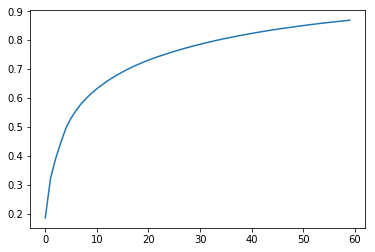

('Training PCA shape', (200, 60))
('Test PCA shape', (200, 60))
Eigen Faces


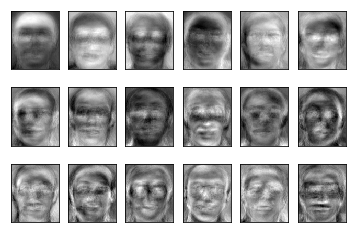

In [144]:
computed_pca = PCA(n_components = 60,whiten=True).fit(X_train)
XTr_pca = computed_pca.transform(X_train)

print("Plot of amount of variance explained vs pcs")
plt.plot(range(len(computed_pca.explained_variance_)),np.cumsum(computed_pca.explained_variance_ratio_))
plt.show()

XTs_pca = computed_pca.transform(X_test)
print("Training PCA shape",XTr_pca.shape)
print("Test PCA shape",XTs_pca.shape)


def plot_eigenfaces(images, h, w, rows=3, cols=6):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
plot_eigenfaces(computed_pca.components_,112,92)
print("Eigen Faces")

In [145]:
print("Original Training matrix shape", X_train.shape)
print("Original Testing matrix shape", X_test.shape)

('Original Training matrix shape', (200, 10304))
('Original Testing matrix shape', (200, 10304))


#### Defining the model

In [146]:
model = Sequential()
model.add(Dense(512,input_shape=(XTr_pca.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [147]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               31232     
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_14 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 40)                20520     
__________

In [148]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=[metrics.mae,metrics.categorical_accuracy])

#### Training

In [149]:
model.fit(XTr_pca, Y_train, batch_size=64, epochs=50, verbose=1, validation_data=(XTs_pca, Y_test))

Train on 200 samples, validate on 200 samples
Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 3.6925 - mean_absolute_error: 0.0486 - categorical_accuracy: 0.0400 - val_loss: 3.4150 - val_mean_absolute_error: 0.0483 - val_categorical_accuracy: 0.2600
Epoch 2/50
200/200 [==============================] - 0s 292us/step - loss: 3.0389 - mean_absolute_error: 0.0473 - categorical_accuracy: 0.4700 - val_loss: 3.1494 - val_mean_absolute_error: 0.0477 - val_categorical_accuracy: 0.4750
Epoch 3/50
200/200 [==============================] - 0s 262us/step - loss: 2.5728 - mean_absolute_error: 0.0456 - categorical_accuracy: 0.7350 - val_loss: 2.8829 - val_mean_absolute_error: 0.0467 - val_categorical_accuracy: 0.5150
Epoch 4/50
200/200 [==============================] - 0s 269us/step - loss: 2.1014 - mean_absolute_error: 0.0425 - categorical_accuracy: 0.8150 - val_loss: 2.5778 - val_mean_absolute_error: 0.0451 - val_categorical_accuracy: 0.6250
Epoch 5/50
200/200 [========

Epoch 36/50
200/200 [==============================] - 0s 227us/step - loss: 0.0304 - mean_absolute_error: 0.0011 - categorical_accuracy: 0.9900 - val_loss: 0.5644 - val_mean_absolute_error: 0.0134 - val_categorical_accuracy: 0.8550
Epoch 37/50
200/200 [==============================] - 0s 244us/step - loss: 0.0235 - mean_absolute_error: 9.3721e-04 - categorical_accuracy: 0.9900 - val_loss: 0.5610 - val_mean_absolute_error: 0.0133 - val_categorical_accuracy: 0.8550
Epoch 38/50
200/200 [==============================] - 0s 259us/step - loss: 0.0322 - mean_absolute_error: 0.0011 - categorical_accuracy: 0.9900 - val_loss: 0.5567 - val_mean_absolute_error: 0.0132 - val_categorical_accuracy: 0.8500
Epoch 39/50
200/200 [==============================] - 0s 242us/step - loss: 0.0335 - mean_absolute_error: 0.0011 - categorical_accuracy: 0.9900 - val_loss: 0.5541 - val_mean_absolute_error: 0.0132 - val_categorical_accuracy: 0.8500
Epoch 40/50
200/200 [==============================] - 0s 228us/

#### Evaluating the performance

In [150]:
loss, mean_absolute_error, accuracy = model.evaluate(XTs_pca,Y_test, verbose=0)

In [151]:
print("Loss:", loss)
print("Categorical Accuracy: ", accuracy)
print("Mean absolute error: ", mean_absolute_error)

('Loss:', 0.5553559827804565)
('Categorical Accuracy: ', 0.85499999999999998)
('Mean absolute error: ', 0.012537865545600652)


In [152]:
predicted_classes = model.predict_classes(XTs_pca)

In [153]:
correct_classified_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_classified_indices = np.nonzero(predicted_classes != y_test)[0]

In [160]:
print("Correctly Classified: ", len(correct_classified_indices))
print("Incorrectly Classified: ", len(incorrect_classified_indices))


('Correctly Classified: ', 171)
('Incorrectly Classified: ', 29)


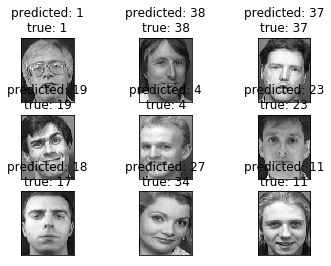

In [156]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=3):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
 
def titles(y_pred, y_test):
    for i in range(y_pred.shape[0]):
        pred_name = y_pred[i]
        true_name = y_test[i]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
        
prediction_titles = list(titles(predicted_classes, y_test))
plot_gallery(X_test, prediction_titles, 112, 92)

